# Football Analysis - Goal Predictor

This dataset contains Premier League Results from 1993-94 to 2021-22. It has the following columns:-<br>

Season :Match Season<br>
DateTime :	Match Date and Time (yyyy-mm-dd hh:mm:ss)<br>
HomeTeam :Home Team<br>
AwayTeam :	Away Team<br>
FTHG :	Full Time Home Team Goals<br>
FTAG :	Full Time Away Team Goals<br>
FTR :	Full Time Result (H=Home Win, D=Draw, A=Away Win)<br>
HTHG :	Half Time Home Team Goals<br>
HTAG :	Half Time Away Team Goals<br>
HTR :Half Time Result (H=Home Win, D=Draw, A=Away Win)<br>
Referee :	Match Referee<br>
HS :	Home Team Shots<br>
AS :	Away Team Shots<br>
HST :	Home Team Shots on Target<br>
AST :	Away Team Shots on Target<br>
HC :	Home Team Corners<br>
AC :	Away Team Corners<br>
HF  :	Home Team Fouls Committed<br>
AF  :	Away Team Fouls Committed<br>
HY  :	Home Team Yellow Cards<br>
AY  :	Away Team Yellow Cards<br>
HR  :	Home Team Red Cards<br>
AR  :	Away Team Red Cards<br>

Goal: To analyze relation of goals between various teams and try to create a goals predictor

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

## Loading Dataframe

In [2]:
fb=pd.read_csv('results.csv')

## First first five rows of dataframe

In [3]:
fb.head(5)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Information about dataframe

In [4]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

## Description of the dataframe

In [5]:
fb.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,11113.000000,11113.000000,10189.000000,10189.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,1.518222,1.141456,0.684758,0.501031,13.503921,10.644589,6.117264,4.768247,6.081795,4.784292,11.379057,11.873447,1.415852,1.746532,0.062854,0.089396
std,1.301981,1.135907,0.836299,0.722299,5.258636,4.583010,3.327521,2.792965,3.095070,2.728954,3.784956,3.957427,1.189134,1.267468,0.253416,0.297341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


## Null values in the dataframe

In [6]:
fb.isnull().sum()

Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
dtype: int64

## Heatmap of null values in dataframe

<AxesSubplot:>

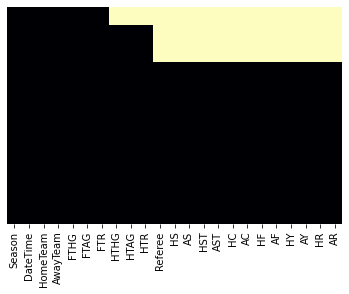

In [7]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in HTHG column

In [8]:
fb['HTHG'].fillna((fb['FTHG']/2).astype(int),inplace=True)

Here half of full time home goals is filled because mean cannot be filled as it might be greater than full time home goals and filling with zero would not help the machine learning model. Filling with half of full time home goals will help machine learning model to predict it.

## Heatmap of NULL Values after filling NULL Values in HTHG column

<AxesSubplot:>

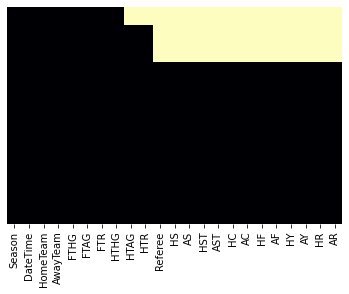

In [9]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in HTAG column

In [10]:
fb['HTAG'].fillna((fb['FTAG']/2).astype(int),inplace=True)

Here half of full time away goals is filled because mean cannot be filled as it might be greater than full time away goals and filling with zero would not help the machine learning model. Filling with half of full time away goals will help machine learning model to predict it.

## Heatmap of NULL Values after filling NULL Values in HTAG column

<AxesSubplot:>

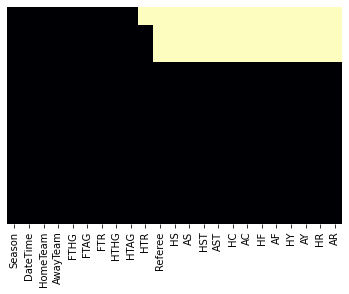

In [11]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in HTR column

In [12]:
fb.loc[fb['HTHG']== fb['HTAG'],'HTR']='D'
fb.loc[fb['HTHG'] > fb['HTAG'],'HTR']='H'
fb.loc[fb['HTHG'] < fb['HTAG'],'HTR']='A'

Here after filling the NULL values of HTHG and HTAG, HTR can be filled by knowing the relationship between HTHG and HTAG of teams

## Heatmap of NULL Values after filling NULL Values in HTR column

<AxesSubplot:>

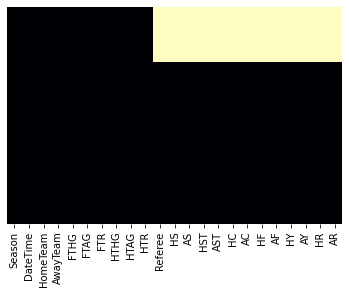

In [13]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in Referee column

In [14]:
fb['Referee'].fillna('Unknown',inplace=True)

Since there is no way to know the actual value of the null values in Referee as it is categorical data, unknown is filled.

## Heatmap of NULL Values after filling NULL Values in Referee column

<AxesSubplot:>

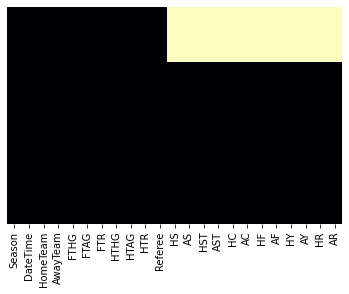

In [15]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in HS column

In [16]:
fb['HS'].fillna(fb['FTHG'],inplace=True)

Here Full time home goals are filled in NULL Values of Home shots because minimum number of shots have to be at least the total number of home goals scored in that match. This would help the machine learning model as it would deviate more towards the prediction of Full time home goals.

## Heatmap of NULL Values after filling NULL Values in HS column

<AxesSubplot:>

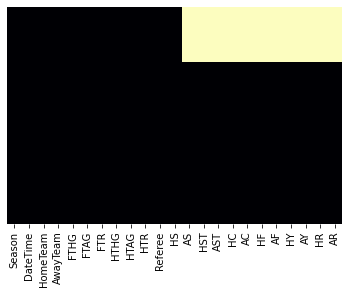

In [17]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in AS column

In [18]:
fb['AS'].fillna(fb['FTAG'],inplace=True)

Here Full time away goals are filled in NULL Values of Away shots because minimum number of shots have to be at least the total number of away goals scored in that match. This would help the machine learning model as it would deviate more towards the prediction of Full time away goals.

## Heatmap of NULL Values after filling NULL Values in AS column

<AxesSubplot:>

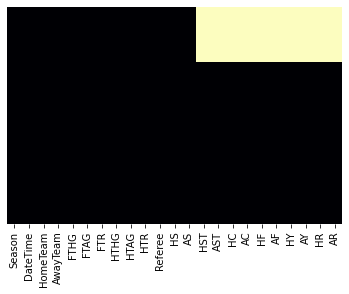

In [19]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in HST column

In [20]:
fb['HST'].fillna(fb['FTHG'],inplace=True)

Here Full time home goals is filled in NULL Values of Home shots on target because minimum number of shots on target have to be at least the total number of home goals scored in that match. This would help the machine learning model as it would deviate more towards the prediction of Full time home goals.

## Heatmap of NULL Values after filling NULL Values in HST column

<AxesSubplot:>

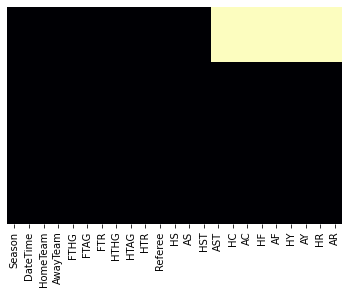

In [21]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in AST column

In [22]:
fb['AST'].fillna(fb['FTAG'],inplace=True)

Here Full time away goals is filled in NULL Values of away shots on target because minimum number of shots have to be at least the total number of away goals scored in that match. This would help the machine learning model as it would deviate more towards the prediction of Full time away goals.

## Heatmap of NULL Values after filling NULL Values in AST column

<AxesSubplot:>

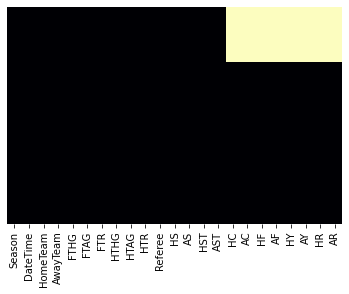

In [23]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in HC column

In [24]:
mean=fb['HC'].mean()
val=int(mean)
fb['HC'].fillna(val,inplace=True)

Here the mean of home corners in the form of integer is filled.

## Heatmap of NULL Values after filling NULL Values in HC column

<AxesSubplot:>

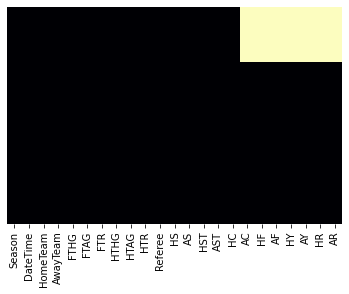

In [25]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in AC column

In [26]:
mean=fb['AC'].mean()
val=int(mean)
fb['AC'].fillna(val,inplace=True)

Here the mean of away corners in the form of integer is filled 

## Heatmap of NULL Values after filling NULL Values in AC column

<AxesSubplot:>

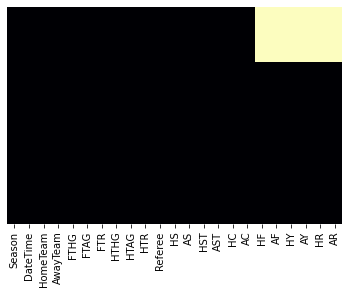

In [27]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in HF column

In [28]:
mean=fb['HF'].mean()
val=int(mean)
fb['HF'].fillna(val,inplace=True)

Here the mean of home fouls in the form of integer is filled 

## Heatmap of NULL Values after filling NULL Values in HF column

<AxesSubplot:>

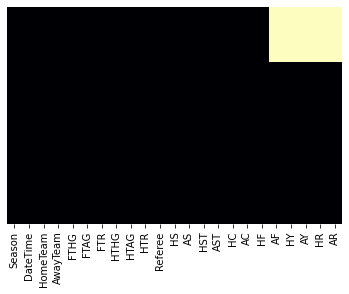

In [29]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in AF column

In [30]:
mean=fb['AF'].mean()
val=int(mean)
fb['AF'].fillna(val,inplace=True)

Here the mean of away fouls in the form of integer is filled 

## Heatmap of NULL Values after filling NULL Values in AF column

<AxesSubplot:>

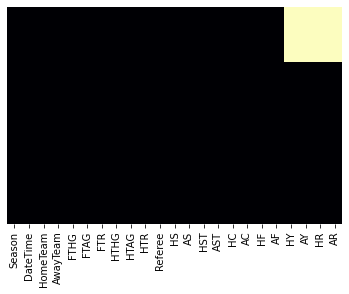

In [31]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in HY column

In [32]:
mean=fb['HY'].mean()
val=int(mean)
fb['HY'].fillna(val,inplace=True)

Here the mean of home yelloe cards in the form of integer is filled 

## Heatmap of NULL Values after filling NULL Values in HY column

<AxesSubplot:>

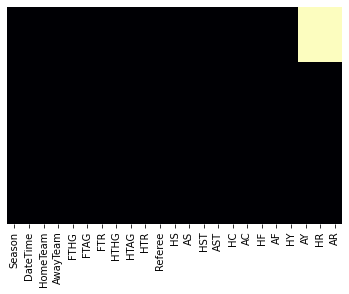

In [33]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in AY column

In [34]:
mean=fb['AY'].mean()
val=int(mean)
fb['AY'].fillna(val,inplace=True)

Here the mean of away yellow cards in the form of integer is filled 

## Heatmap of NULL Values after filling NULL Values in HY column

<AxesSubplot:>

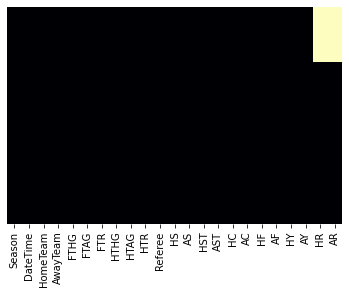

In [35]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in HR column

In [36]:
mean=fb['HR'].mean()
val=int(mean)
fb['HR'].fillna(val,inplace=True)

Here the mean of home red cards in the form of integer is filled 

## Heatmap of NULL Values after filling NULL Values in HR column

<AxesSubplot:>

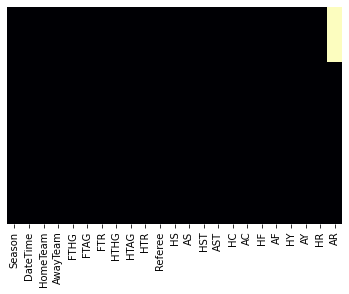

In [37]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Filling NULL Values in AR column

In [38]:
mean=fb['AR'].mean()
val=int(mean)
fb['AR'].fillna(val,inplace=True)

Here the mean of away red cards in the form of integer is filled 

## Heatmap of NULL Values after filling NULL Values in AR column

<AxesSubplot:>

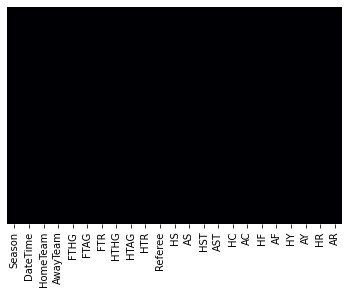

In [39]:
sns.heatmap(fb.isnull(),yticklabels=False,cbar=False,cmap='magma')

## Information about the cleaned dataframe

In [40]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      11113 non-null  float64
 8   HTAG      11113 non-null  float64
 9   HTR       11113 non-null  object 
 10  Referee   11113 non-null  object 
 11  HS        11113 non-null  float64
 12  AS        11113 non-null  float64
 13  HST       11113 non-null  float64
 14  AST       11113 non-null  float64
 15  HC        11113 non-null  float64
 16  AC        11113 non-null  float64
 17  HF        11113 non-null  float64
 18  AF        11113 non-null  float64
 19  HY        11113 non-null  float64
 20  AY        11113 non-null  fl

## Dropping Season and DateTime Column from dataframe

In [41]:
fb.drop(['Season','DateTime'],axis=1,inplace=True)
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  11113 non-null  object 
 1   AwayTeam  11113 non-null  object 
 2   FTHG      11113 non-null  int64  
 3   FTAG      11113 non-null  int64  
 4   FTR       11113 non-null  object 
 5   HTHG      11113 non-null  float64
 6   HTAG      11113 non-null  float64
 7   HTR       11113 non-null  object 
 8   Referee   11113 non-null  object 
 9   HS        11113 non-null  float64
 10  AS        11113 non-null  float64
 11  HST       11113 non-null  float64
 12  AST       11113 non-null  float64
 13  HC        11113 non-null  float64
 14  AC        11113 non-null  float64
 15  HF        11113 non-null  float64
 16  AF        11113 non-null  float64
 17  HY        11113 non-null  float64
 18  AY        11113 non-null  float64
 19  HR        11113 non-null  float64
 20  AR        11113 non-null  fl

Season and DateTime would not be required for predicting the score.

## Exploratory Data Analysis

### Total number of goals scored and conceded by each team in their home ground

In [42]:
fb_ht=fb.groupby('HomeTeam').sum()
fb_ht.head(5)

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
HomeTeam,,,,,,,,,,,,,,,,
Arsenal,1119,466,481.0,209.0,6728.0,3625.0,3458.0,1625.0,3861.0,2187.0,5997.0,6725.0,712.0,979.0,25.0,57.0
Aston Villa,643,557,278.0,249.0,4425.0,4032.0,2110.0,1967.0,3018.0,2463.0,5726.0,5835.0,644.0,767.0,25.0,35.0
Barnsley,25,35,14.0,14.0,25.0,35.0,25.0,35.0,114.0,76.0,209.0,209.0,19.0,19.0,0.0,0.0
Birmingham,162,140,66.0,47.0,1365.0,1411.0,707.0,730.0,748.0,687.0,1634.0,1842.0,191.0,218.0,13.0,12.0
Blackburn,507,363,244.0,149.0,2863.0,2320.0,1561.0,1313.0,1914.0,1527.0,4184.0,3950.0,460.0,478.0,23.0,20.0


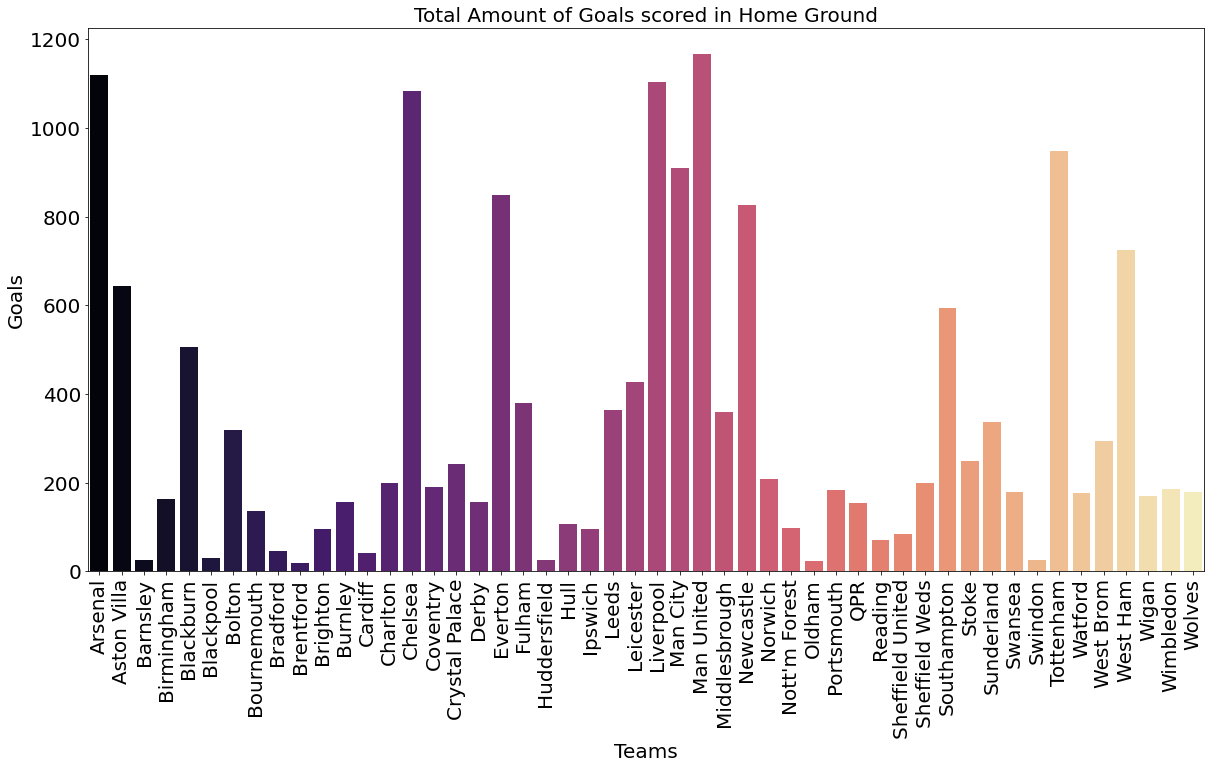

In [43]:
plt.figure(figsize=(20,10))
X=fb_ht.index
ax=sns.barplot(x=X,y='FTHG',data=fb_ht,palette="magma",ci=None)
plt.title('Total Amount of Goals scored in Home Ground',fontdict={'size':20})
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Teams',fontdict={'size':20})
plt.ylabel('Goals',fontdict={'size':20})
plt.show()

Here we can see Man United have scored the most home goals and Brentford have scored the least home goals.

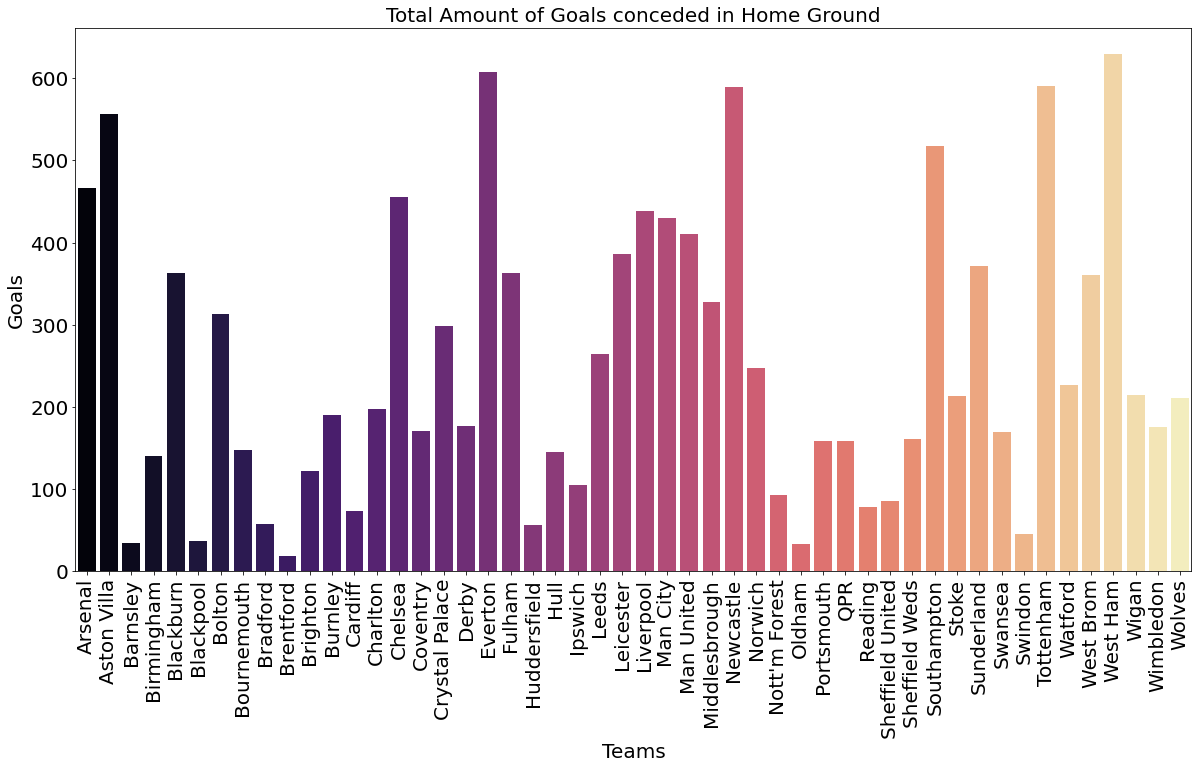

In [44]:
plt.figure(figsize=(20,10))
X=fb_ht.index
ax=sns.barplot(x=X,y='FTAG',data=fb_ht,palette="magma",ci=None)
plt.title('Total Amount of Goals conceded in Home Ground',fontdict={'size':20})
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Teams',fontdict={'size':20})
plt.ylabel('Goals',fontdict={'size':20})
plt.show()

Here we can see Everton have conceded the most in Home Ground and Brentford have conceded the least in Home Ground

Here Brentford having least in both cases is because they have had one season in past 30 years and hence very less matches

### Average number of goals scored and conceded by each team in their home ground

In [45]:
fb_hm=fb.groupby('HomeTeam').mean()
fb_hm.head(5)

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
HomeTeam,,,,,,,,,,,,,,,,
Arsenal,2.027174,0.844203,0.871377,0.378623,12.188406,6.567029,6.264493,2.943841,6.994565,3.961957,10.864130,12.182971,1.289855,1.773551,0.045290,0.103261
Aston Villa,1.301619,1.127530,0.562753,0.504049,8.957490,8.161943,4.271255,3.981781,6.109312,4.985830,11.591093,11.811741,1.303644,1.552632,0.050607,0.070850
Barnsley,1.315789,1.842105,0.736842,0.736842,1.315789,1.842105,1.315789,1.842105,6.000000,4.000000,11.000000,11.000000,1.000000,1.000000,0.000000,0.000000
Birmingham,1.218045,1.052632,0.496241,0.353383,10.263158,10.609023,5.315789,5.488722,5.624060,5.165414,12.285714,13.849624,1.436090,1.639098,0.097744,0.090226
Blackburn,1.550459,1.110092,0.746177,0.455657,8.755352,7.094801,4.773700,4.015291,5.853211,4.669725,12.795107,12.079511,1.406728,1.461774,0.070336,0.061162


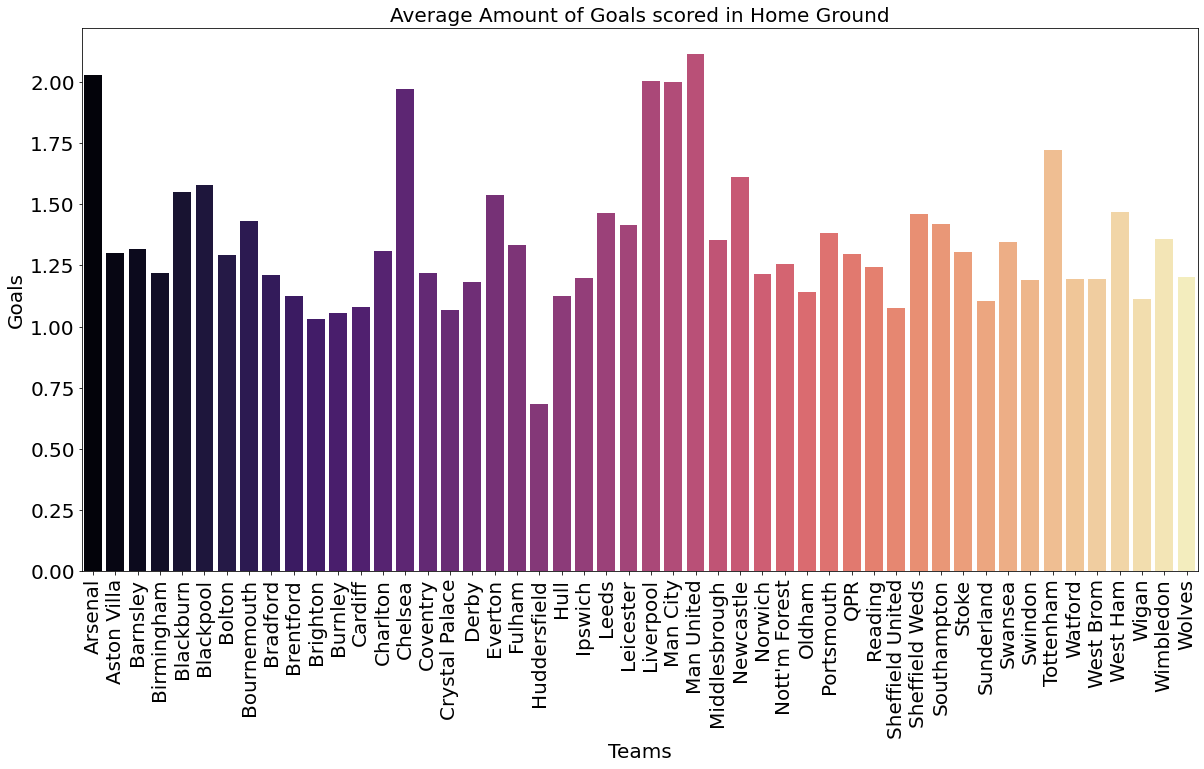

In [46]:
plt.figure(figsize=(20,10))
X=fb_hm.index
ax=sns.barplot(x=X,y='FTHG',data=fb_hm,palette="magma",ci=None)
plt.title('Average Amount of Goals scored in Home Ground',fontdict={'size':20})
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Teams',fontdict={'size':20})
plt.ylabel('Goals',fontdict={'size':20})
plt.show()

Here we can see Man United have very high average home goals scored and Huddersfield have very low average goals scored. 

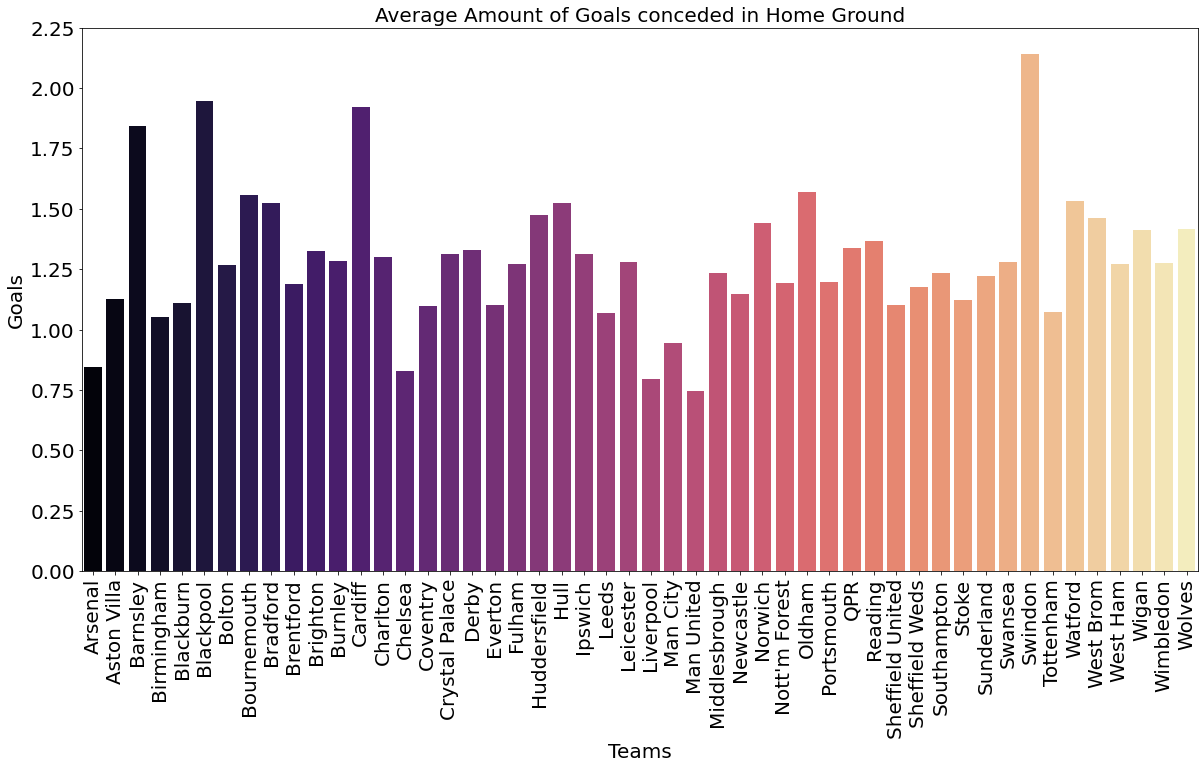

In [47]:
plt.figure(figsize=(20,10))
X=fb_hm.index
ax=sns.barplot(x=X,y='FTAG',data=fb_hm,palette="magma",ci=None)
plt.title('Average Amount of Goals conceded in Home Ground',fontdict={'size':20})
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Teams',fontdict={'size':20})
plt.ylabel('Goals',fontdict={'size':20})
plt.show()

Here we can see Swindon have very high average goals conceded in home ground and Man United have very low average goals conceded in home ground. 

In Home Ground, Man United has been very successful in respect to scoring as well as not conceding.

### Total number of goals scored and conceded by each team in the away ground

In [48]:
fb_at=fb.groupby('AwayTeam').sum()
fb_at.head(5)

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
AwayTeam,,,,,,,,,,,,,,,,
Arsenal,632,842,276.0,385.0,4732.0,5224.0,2140.0,2590.0,2949.0,2705.0,6507.0,6064.0,881.0,839.0,36.0,48.0
Aston Villa,748,555,314.0,242.0,5248.0,3792.0,2521.0,1854.0,3161.0,2334.0,5748.0,6131.0,662.0,825.0,30.0,23.0
Barnsley,47,12,25.0,8.0,47.0,12.0,47.0,12.0,114.0,76.0,209.0,209.0,19.0,19.0,0.0,0.0
Birmingham,220,111,101.0,51.0,1830.0,1064.0,1021.0,549.0,846.0,565.0,1728.0,1687.0,163.0,241.0,13.0,14.0
Blackburn,498,352,208.0,134.0,2957.0,2123.0,1671.0,1170.0,2062.0,1508.0,3766.0,4146.0,413.0,529.0,15.0,27.0


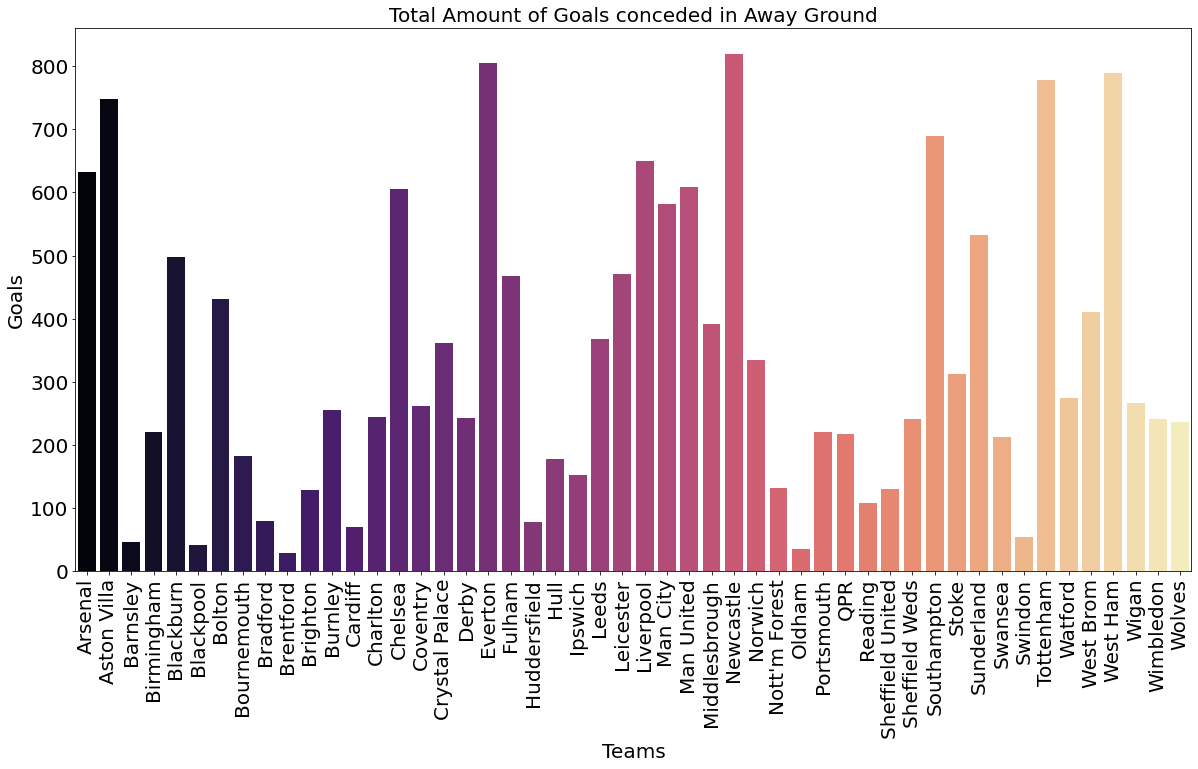

In [49]:
plt.figure(figsize=(20,10))
X=fb_at.index
ax=sns.barplot(x=X,y='FTHG',data=fb_at,palette="magma",ci=None)
plt.title('Total Amount of Goals conceded in Away Ground',fontdict={'size':20})
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Teams',fontdict={'size':20})
plt.ylabel('Goals',fontdict={'size':20})
plt.show()

Here Newcastle have conceded highest number goals during away games and Brentford have conceded least goals during home games

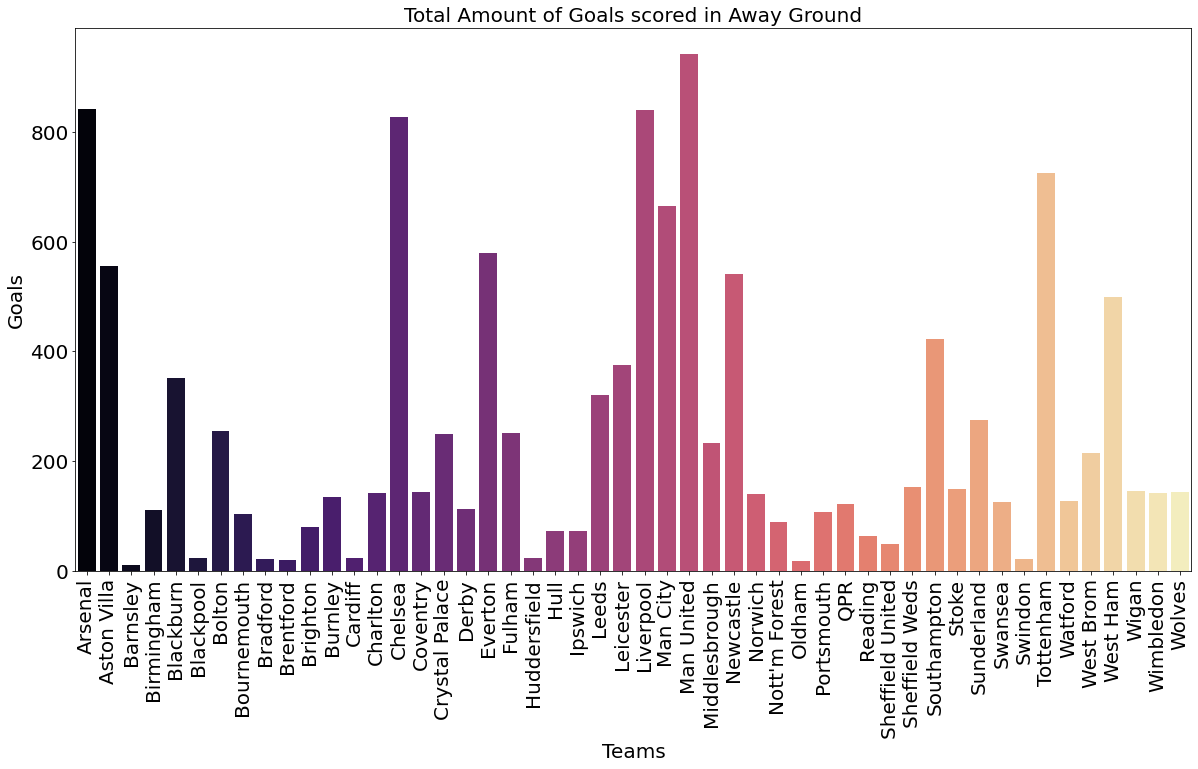

In [50]:
plt.figure(figsize=(20,10))
X=fb_at.index
ax=sns.barplot(x=X,y='FTAG',data=fb_at,palette="magma",ci=None)
plt.title('Total Amount of Goals scored in Away Ground',fontdict={'size':20})
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Teams',fontdict={'size':20})
plt.ylabel('Goals',fontdict={'size':20})
plt.show()

Here Man United have scored the most away goals and Barnsley have scored the least away goals

### Average number of goals scored and conceded by each team in the away ground

In [51]:
fb_am=fb.groupby('AwayTeam').mean()
fb_am.head(5)

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
AwayTeam,,,,,,,,,,,,,,,,
Arsenal,1.149091,1.530909,0.501818,0.700000,8.603636,9.498182,3.890909,4.709091,5.361818,4.918182,11.830909,11.025455,1.601818,1.525455,0.065455,0.087273
Aston Villa,1.511111,1.121212,0.634343,0.488889,10.602020,7.660606,5.092929,3.745455,6.385859,4.715152,11.612121,12.385859,1.337374,1.666667,0.060606,0.046465
Barnsley,2.473684,0.631579,1.315789,0.421053,2.473684,0.631579,2.473684,0.631579,6.000000,4.000000,11.000000,11.000000,1.000000,1.000000,0.000000,0.000000
Birmingham,1.654135,0.834586,0.759398,0.383459,13.759398,8.000000,7.676692,4.127820,6.360902,4.248120,12.992481,12.684211,1.225564,1.812030,0.097744,0.105263
Blackburn,1.522936,1.076453,0.636086,0.409786,9.042813,6.492355,5.110092,3.577982,6.305810,4.611621,11.516820,12.678899,1.262997,1.617737,0.045872,0.082569


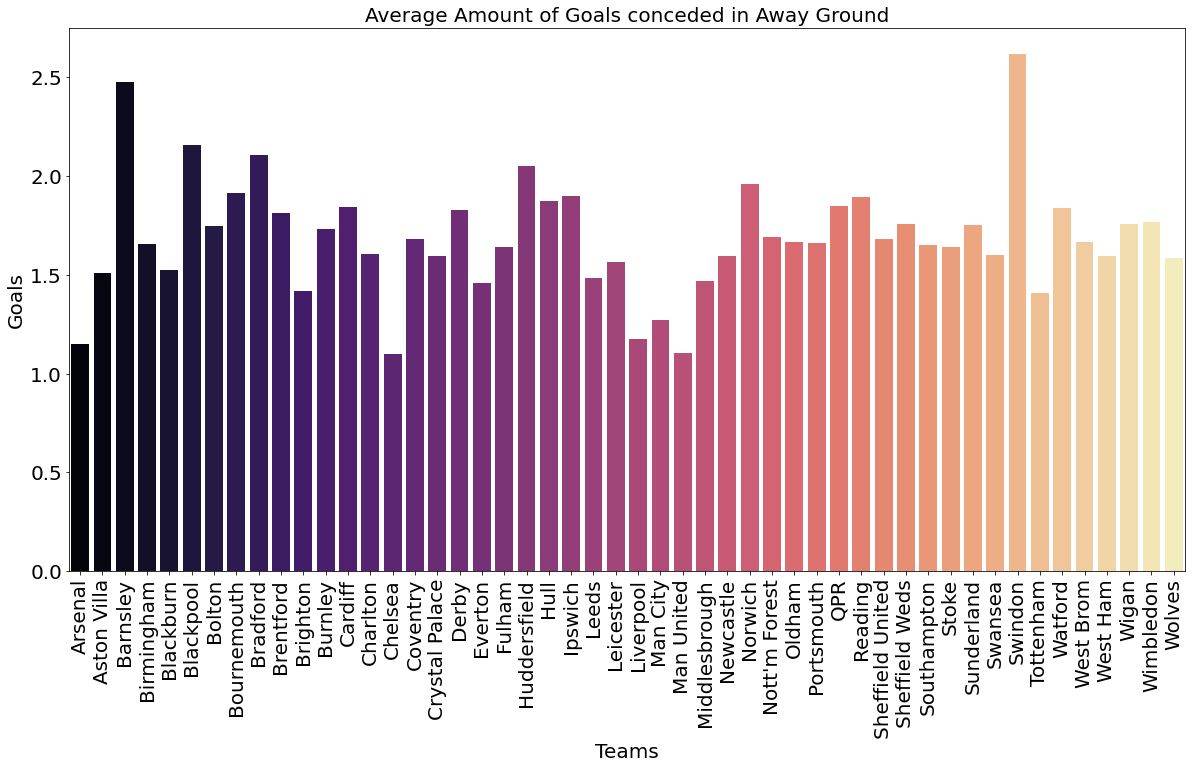

In [52]:
plt.figure(figsize=(20,10))
X=fb_am.index
ax=sns.barplot(x=X,y='FTHG',data=fb_am,palette="magma",ci=None)
plt.title('Average Amount of Goals conceded in Away Ground',fontdict={'size':20})
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Teams',fontdict={'size':20})
plt.ylabel('Goals',fontdict={'size':20})
plt.show()

Here Swindon have a highest average of conceded goals in away games and Man United have the least average of conceded goals in away games.

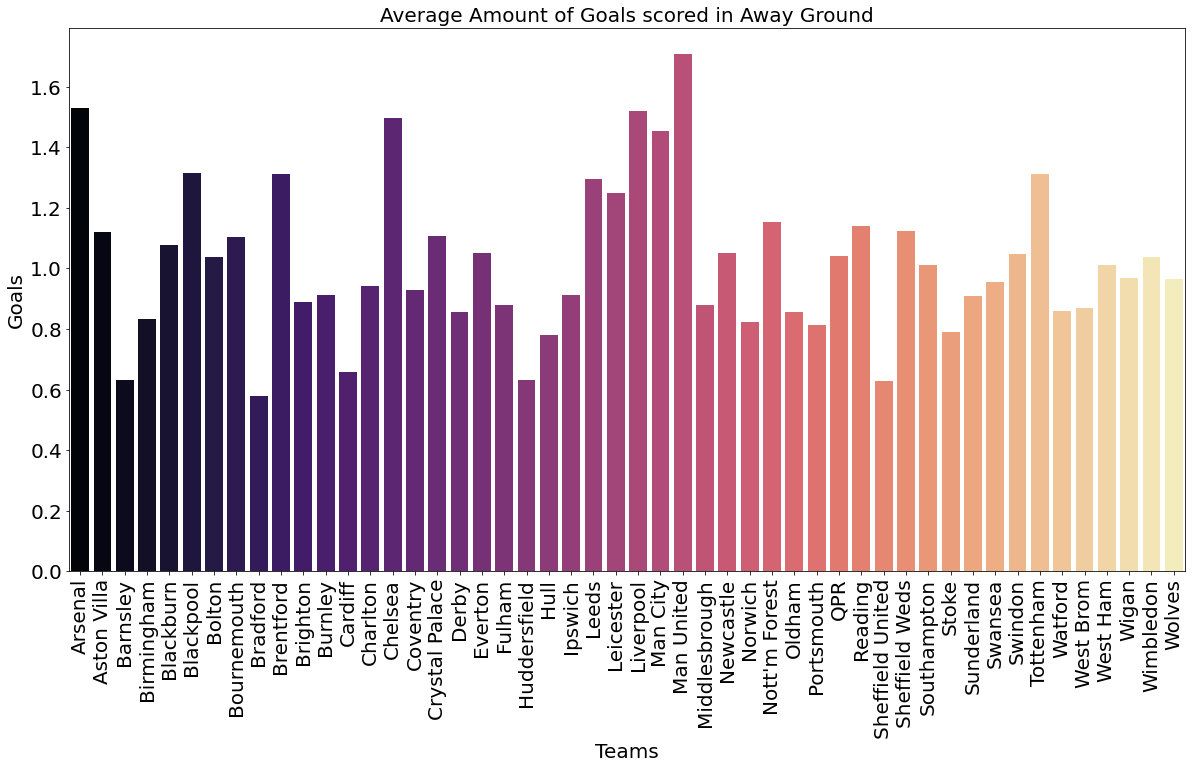

In [53]:
plt.figure(figsize=(20,10))
X=fb_am.index
ax=sns.barplot(x=X,y='FTAG',data=fb_am,palette="magma",ci=None)
plt.title('Average Amount of Goals scored in Away Ground',fontdict={'size':20})
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Teams',fontdict={'size':20})
plt.ylabel('Goals',fontdict={'size':20})
plt.show()

Here Man United have highest average away goals scored and Bradford have least average away goals conceded.

## Label Encoding of Categorical Data

### Importing Library of Label Encoder

In [54]:
from sklearn.preprocessing import LabelEncoder

### Initializing Label Encoder

In [55]:
le = LabelEncoder() 

### Label Encoding Home Team

In [56]:
fb['Home_Labelled']=le.fit_transform(fb['HomeTeam'])

In [57]:
fb.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,Home_Labelled
0,Arsenal,Coventry,0,3,A,0.0,1.0,A,Unknown,0.0,...,3.0,6.0,4.0,11.0,11.0,1.0,1.0,0.0,0.0,0
1,Aston Villa,QPR,4,1,H,2.0,0.0,H,Unknown,4.0,...,1.0,6.0,4.0,11.0,11.0,1.0,1.0,0.0,0.0,1
2,Chelsea,Blackburn,1,2,A,0.0,1.0,A,Unknown,1.0,...,2.0,6.0,4.0,11.0,11.0,1.0,1.0,0.0,0.0,14
3,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,H,Unknown,2.0,...,0.0,6.0,4.0,11.0,11.0,1.0,1.0,0.0,0.0,25
4,Man City,Leeds,1,1,D,0.0,0.0,D,Unknown,1.0,...,1.0,6.0,4.0,11.0,11.0,1.0,1.0,0.0,0.0,26


### Label Encoding Away Team

In [58]:
fb['Away_Labelled']=le.fit_transform(fb['AwayTeam'])

In [59]:
fb.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HC,AC,HF,AF,HY,AY,HR,AR,Home_Labelled,Away_Labelled
0,Arsenal,Coventry,0,3,A,0.0,1.0,A,Unknown,0.0,...,6.0,4.0,11.0,11.0,1.0,1.0,0.0,0.0,0,15
1,Aston Villa,QPR,4,1,H,2.0,0.0,H,Unknown,4.0,...,6.0,4.0,11.0,11.0,1.0,1.0,0.0,0.0,1,34
2,Chelsea,Blackburn,1,2,A,0.0,1.0,A,Unknown,1.0,...,6.0,4.0,11.0,11.0,1.0,1.0,0.0,0.0,14,4
3,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,H,Unknown,2.0,...,6.0,4.0,11.0,11.0,1.0,1.0,0.0,0.0,25,37
4,Man City,Leeds,1,1,D,0.0,0.0,D,Unknown,1.0,...,6.0,4.0,11.0,11.0,1.0,1.0,0.0,0.0,26,23


### Label Encoding Referee

In [60]:
fb['Referee_Labelled']=le.fit_transform(fb['Referee'])

In [61]:
fb.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AC,HF,AF,HY,AY,HR,AR,Home_Labelled,Away_Labelled,Referee_Labelled
0,Arsenal,Coventry,0,3,A,0.0,1.0,A,Unknown,0.0,...,4.0,11.0,11.0,1.0,1.0,0.0,0.0,0,15,143
1,Aston Villa,QPR,4,1,H,2.0,0.0,H,Unknown,4.0,...,4.0,11.0,11.0,1.0,1.0,0.0,0.0,1,34,143
2,Chelsea,Blackburn,1,2,A,0.0,1.0,A,Unknown,1.0,...,4.0,11.0,11.0,1.0,1.0,0.0,0.0,14,4,143
3,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,H,Unknown,2.0,...,4.0,11.0,11.0,1.0,1.0,0.0,0.0,25,37,143
4,Man City,Leeds,1,1,D,0.0,0.0,D,Unknown,1.0,...,4.0,11.0,11.0,1.0,1.0,0.0,0.0,26,23,143


### Label Encoding FTR

In [62]:
fb['FTR_Labelled']=le.fit_transform(fb['FTR'])

In [63]:
fb.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HF,AF,HY,AY,HR,AR,Home_Labelled,Away_Labelled,Referee_Labelled,FTR_Labelled
0,Arsenal,Coventry,0,3,A,0.0,1.0,A,Unknown,0.0,...,11.0,11.0,1.0,1.0,0.0,0.0,0,15,143,0
1,Aston Villa,QPR,4,1,H,2.0,0.0,H,Unknown,4.0,...,11.0,11.0,1.0,1.0,0.0,0.0,1,34,143,2
2,Chelsea,Blackburn,1,2,A,0.0,1.0,A,Unknown,1.0,...,11.0,11.0,1.0,1.0,0.0,0.0,14,4,143,0
3,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,H,Unknown,2.0,...,11.0,11.0,1.0,1.0,0.0,0.0,25,37,143,2
4,Man City,Leeds,1,1,D,0.0,0.0,D,Unknown,1.0,...,11.0,11.0,1.0,1.0,0.0,0.0,26,23,143,1


### Label Encoding HTR

In [64]:
fb['HTR_Labelled']=le.fit_transform(fb['HTR'])

In [65]:
fb.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,AF,HY,AY,HR,AR,Home_Labelled,Away_Labelled,Referee_Labelled,FTR_Labelled,HTR_Labelled
0,Arsenal,Coventry,0,3,A,0.0,1.0,A,Unknown,0.0,...,11.0,1.0,1.0,0.0,0.0,0,15,143,0,0
1,Aston Villa,QPR,4,1,H,2.0,0.0,H,Unknown,4.0,...,11.0,1.0,1.0,0.0,0.0,1,34,143,2,2
2,Chelsea,Blackburn,1,2,A,0.0,1.0,A,Unknown,1.0,...,11.0,1.0,1.0,0.0,0.0,14,4,143,0,0
3,Liverpool,Sheffield Weds,2,0,H,1.0,0.0,H,Unknown,2.0,...,11.0,1.0,1.0,0.0,0.0,25,37,143,2,2
4,Man City,Leeds,1,1,D,0.0,0.0,D,Unknown,1.0,...,11.0,1.0,1.0,0.0,0.0,26,23,143,1,1


### Information of Dataframe after encoding categorical columns

In [66]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomeTeam          11113 non-null  object 
 1   AwayTeam          11113 non-null  object 
 2   FTHG              11113 non-null  int64  
 3   FTAG              11113 non-null  int64  
 4   FTR               11113 non-null  object 
 5   HTHG              11113 non-null  float64
 6   HTAG              11113 non-null  float64
 7   HTR               11113 non-null  object 
 8   Referee           11113 non-null  object 
 9   HS                11113 non-null  float64
 10  AS                11113 non-null  float64
 11  HST               11113 non-null  float64
 12  AST               11113 non-null  float64
 13  HC                11113 non-null  float64
 14  AC                11113 non-null  float64
 15  HF                11113 non-null  float64
 16  AF                11113 non-null  float6

## Correlation and Clustering of various columns

### Correlation dataframe

In [67]:
fb_corr=fb.corr()
fb_corr

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,...,AF,HY,AY,HR,AR,Home_Labelled,Away_Labelled,Referee_Labelled,FTR_Labelled,HTR_Labelled
FTHG,1.000000,-0.055474,0.704886,-0.025166,0.209377,-0.077800,0.392776,-0.070115,0.025899,-0.059325,...,-0.032198,-0.101631,-0.000530,-0.066748,0.072119,-0.040024,0.047463,-0.000973,0.620088,0.471621
FTAG,-0.055474,1.000000,-0.038809,0.692967,-0.058613,0.255493,-0.071312,0.423795,-0.065494,0.042663,...,-0.024378,0.098947,-0.015981,0.104635,-0.056376,0.054627,-0.050438,-0.031623,-0.626093,-0.456192
HTHG,0.704886,-0.038809,1.000000,-0.025553,0.124201,0.000411,0.262421,-0.012904,-0.044001,0.014672,...,-0.019272,-0.070366,0.007858,-0.023024,0.035498,-0.036665,0.034135,-0.022856,0.438528,0.665022
HTAG,-0.025166,0.692967,-0.025553,1.000000,0.005537,0.173701,-0.022914,0.295806,-0.017890,-0.009606,...,0.004674,0.093844,0.004104,0.071131,-0.014333,0.042323,-0.047547,-0.047014,-0.429680,-0.632825
HS,0.209377,-0.058613,0.124201,0.005537,1.000000,0.394210,0.798328,0.281465,0.319413,-0.072724,...,0.063479,0.058871,0.229301,0.023699,0.172792,-0.013673,0.036979,-0.537934,0.142519,0.063038
AS,-0.077800,0.255493,0.000411,0.173701,0.394210,1.000000,0.263877,0.798416,-0.202589,0.421586,...,-0.003268,0.201525,0.156997,0.164643,0.036088,0.047162,-0.017310,-0.534106,-0.185651,-0.099871
HST,0.392776,-0.071312,0.262421,-0.022914,0.798328,0.263877,1.000000,0.280981,0.294366,-0.051439,...,0.084511,-0.013074,0.167503,0.013985,0.153627,-0.037238,0.038708,-0.375225,0.267711,0.176693
AST,-0.070115,0.423795,-0.012904,0.295806,0.281465,0.798416,0.280981,1.000000,-0.134844,0.357716,...,0.028838,0.147150,0.117754,0.152215,0.021684,0.039497,-0.040181,-0.382420,-0.282824,-0.185293
HC,0.025899,-0.065494,-0.044001,-0.017890,0.319413,-0.202589,0.294366,-0.134844,1.000000,-0.234571,...,0.012289,-0.053986,0.035156,-0.055830,0.049615,-0.047912,0.023592,0.012500,0.041381,-0.032493
AC,-0.059325,0.042663,0.014672,-0.009606,-0.072724,0.421586,-0.051439,0.357716,-0.234571,1.000000,...,-0.043267,0.065900,0.000797,0.085190,-0.045174,0.007436,-0.035285,-0.095507,-0.033684,0.034721


### Correlation heatmap

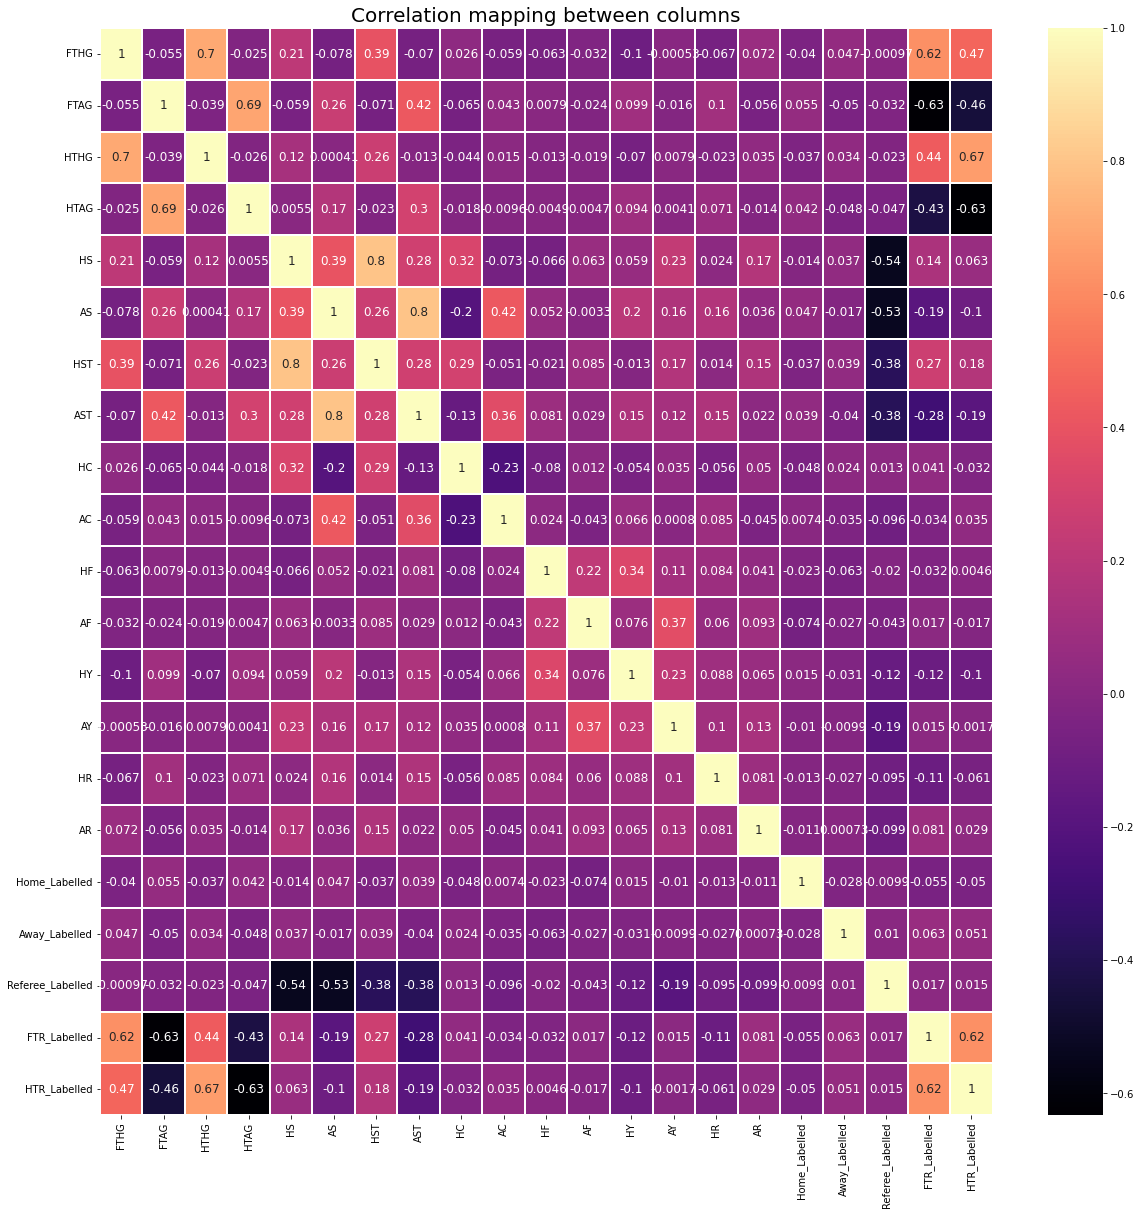

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(fb_corr,annot=True,cmap='magma',linewidths=0.3,annot_kws={'fontsize':12})
plt.title('Correlation mapping between columns',fontsize=20)
plt.show()

### Correlation with Clustering heatmap

Text(0.5, 0.98, 'Clustering with Correlation mapping')

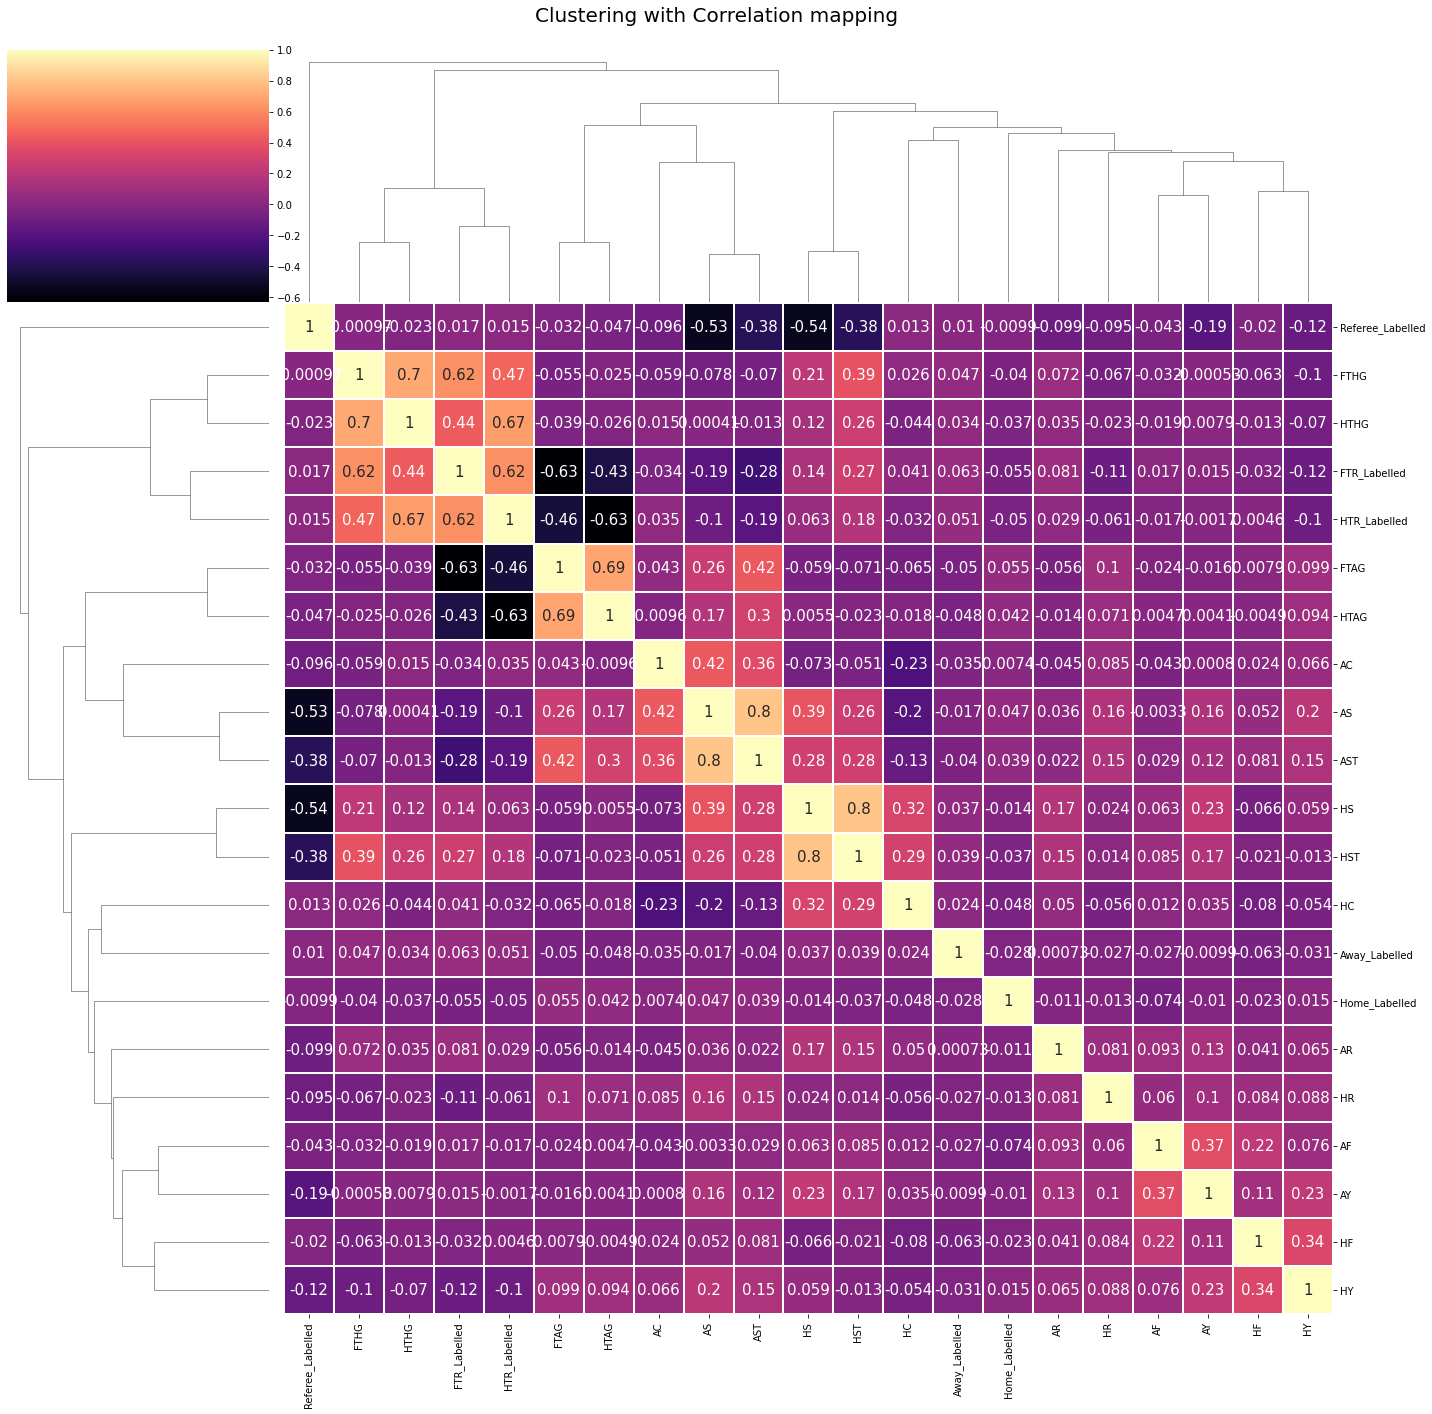

In [69]:
plot = sns.clustermap(fb_corr,annot=True,cmap='magma',linewidths=0.3,figsize=(20,20),annot_kws={'fontsize':15})
plot.fig.subplots_adjust(top=.95)
plot.fig.suptitle('Clustering with Correlation mapping',size=20)

### Correlation of FTHG with other columns of dataframe plot

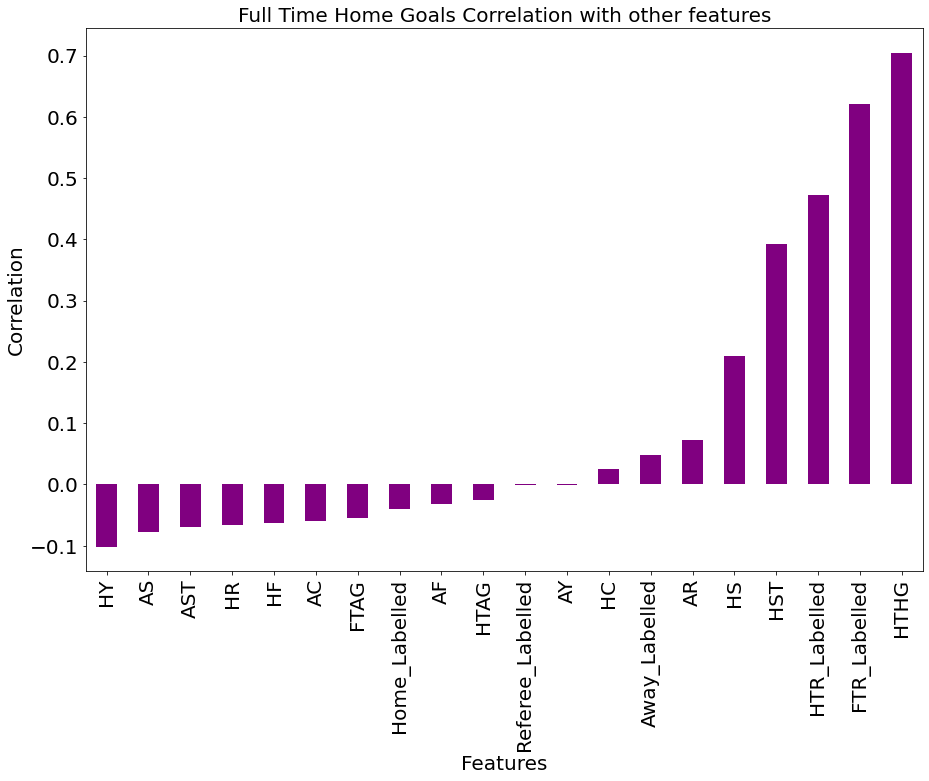

In [70]:
plt.figure(figsize=(15,10))
fb_corr['FTHG'].sort_values()[:-1].plot(kind='bar',color='purple')
plt.title('Full Time Home Goals Correlation with other features',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Features',fontdict={'size':20})
plt.ylabel('Correlation',fontdict={'size':20})
plt.show()

Positive correlated features would be used to predict the FTHG.

### Correlation of FTAG with other columns of dataframe plot

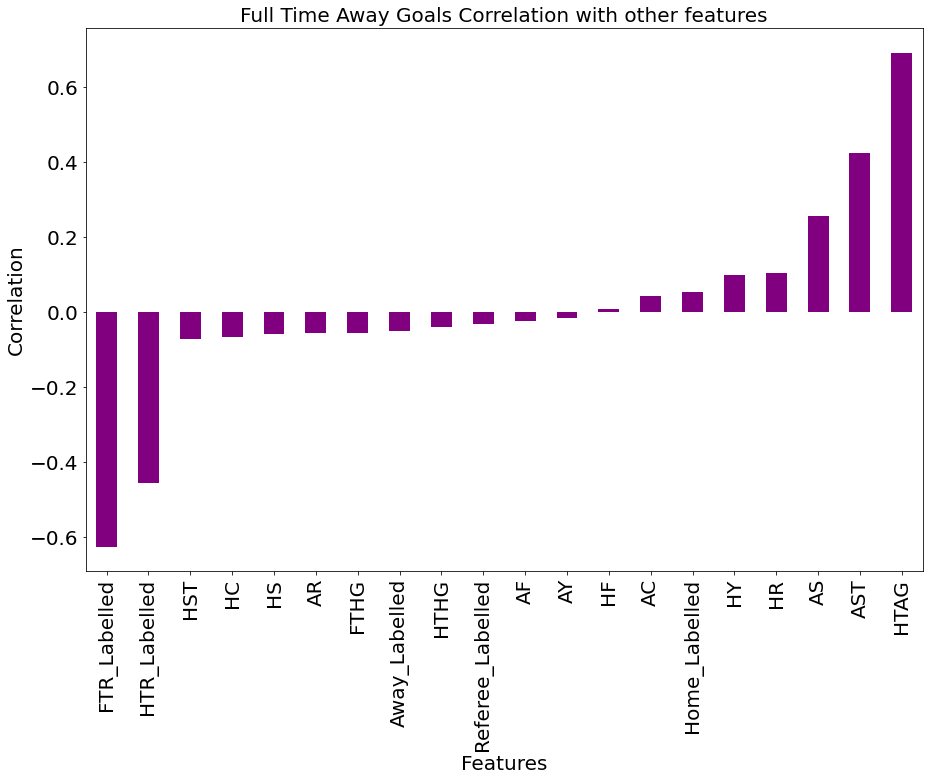

In [71]:
plt.figure(figsize=(15,10))
fb_corr['FTAG'].sort_values()[:-1].plot(kind='bar',color='purple')
plt.title('Full Time Away Goals Correlation with other features',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Features',fontdict={'size':20})
plt.ylabel('Correlation',fontdict={'size':20})
plt.show()

Positive correlated features would be used to predict the FTAG.

## Machine Learning

### Importing Library for Train test split

In [72]:
from sklearn.model_selection import train_test_split

### Choosing X and Y for predicting FTHG

In [73]:
X=fb[['Referee_Labelled','AY','HC','Away_Labelled','AR','HS','HST','HTR_Labelled','FTR_Labelled','HTHG']]
Y=fb['FTHG']

### Splitting X and Y into train and test datasets

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.01)

### Importing Random Forest Classifier

This is a multiclass Classification problem and hence random forest classifier would be used to predict the goals.

In [75]:
from sklearn.ensemble import RandomForestClassifier

### Initializing Random Forest Classifier

In [76]:
rfc1=RandomForestClassifier(n_estimators=1000)

### Fitting X-train and Y-train into Random Forest Classifier

In [77]:
rfc1.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

### Predicting FTHG for X-test from the Random Forest Classifier

In [78]:
rfc1_pred=rfc1.predict(X_test)

### Importing Library for Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix

### Confusion Matrix between predicted and actual FTHG of test data

In [80]:
confusion_matrix(Y_test,rfc1_pred)

array([[21,  1,  0,  0,  0,  0],
       [ 8, 26,  8,  1,  0,  0],
       [ 1,  5, 16,  5,  0,  0],
       [ 0,  1,  2,  2,  1,  0],
       [ 0,  0,  3,  1,  5,  1],
       [ 0,  0,  0,  0,  3,  1]], dtype=int64)

### Importing Library for Classification Report

In [81]:
from sklearn.metrics import classification_report

### Classification Report between predicted and actual FTHG of test data

In [82]:
print(classification_report(Y_test,rfc1_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        22
           1       0.79      0.60      0.68        43
           2       0.55      0.59      0.57        27
           3       0.22      0.33      0.27         6
           4       0.56      0.50      0.53        10
           5       0.50      0.25      0.33         4

    accuracy                           0.63       112
   macro avg       0.55      0.54      0.53       112
weighted avg       0.65      0.63      0.63       112



### Choosing X and Y for predicting FTAG

In [83]:
X=fb[['HF','AC','Home_Labelled','HY','HR','AS','AST','HTAG']]
Y=fb['FTAG']

### Splitting X and Y into train and test datasets

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.01)

### Initializing Random Forest Classifier

In [85]:
rfc2=RandomForestClassifier(n_estimators=1000)

### Fitting X-train and Y-train into Random Forest Classifier

In [86]:
rfc2.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

### Predicting FTAG for X-test from the Random Forest Classifier

In [87]:
rfc2_pred=rfc2.predict(X_test)

### Confusion Matrix between predicted and actual FTAG of test data

In [88]:
confusion_matrix(Y_test,rfc2_pred)

array([[38,  7,  0,  0,  0,  0,  0],
       [10, 22,  1,  0,  0,  0,  0],
       [ 3,  4,  8,  1,  0,  0,  0],
       [ 1,  3,  3,  5,  0,  0,  0],
       [ 0,  0,  0,  3,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0]], dtype=int64)

### Classification Report between predicted and actual FTAG of test data

In [89]:
print(classification_report(Y_test,rfc2_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        45
           1       0.61      0.67      0.64        33
           2       0.67      0.50      0.57        16
           3       0.45      0.42      0.43        12
           4       1.00      0.25      0.40         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.66       112
   macro avg       0.49      0.38      0.40       112
weighted avg       0.65      0.66      0.65       112



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Goal Score Predictor

### Function that predicts goals 

In [90]:
def func(team1,team2):
    hl=fb[fb['HomeTeam']==team1]['Home_Labelled'].iloc[0]
    al=fb[fb['AwayTeam']==team2]['Away_Labelled'].iloc[0]
    home_data=fb.groupby('HomeTeam').mean()
    rl=home_data['Referee_Labelled'][team1]
    ay=home_data['AY'][team1]
    hc=home_data['HC'][team1]
    ar=home_data['AR'][team1]
    hs=home_data['HS'][team1]
    hst=home_data['HST'][team1]
    htrl=fb[fb['HomeTeam']==team1]['HTR_Labelled'].value_counts().idxmax()
    ftrl=fb[fb['HomeTeam']==team1]['FTR_Labelled'].value_counts().idxmax()
    hthg=home_data['HTHG'][team1]
    test1=[[rl,ay,hc,al,ar,hs,hst,htrl,ftrl,hthg]]
    pred1=rfc1.predict(test1)
    away_data=fb.groupby('AwayTeam').mean()
    hf=away_data['HF'][team2]
    ac=away_data['AC'][team2]
    hy=away_data['HY'][team2]
    hr=away_data['HR'][team2]
    a_s=away_data['AS'][team2]
    ast=away_data['AST'][team2]
    htag=away_data['HTAG'][team2]
    test2=[[hf,ac,hl,hy,hr,a_s,ast,htag]]
    pred2=rfc2.predict(test2)
    print(f"{team1}:{pred1[0]}-{pred2[0]}:{team2}")
    if(pred1==pred2):
        print('Draw')
    elif(pred1>pred2):
        print(team1+" wins")
    else:
        print(team2+" wins")

### List of Teams

In [91]:
home_data=fb.groupby('HomeTeam').mean()
teams=home_data.index.tolist()
teams

['Arsenal',
 'Aston Villa',
 'Barnsley',
 'Birmingham',
 'Blackburn',
 'Blackpool',
 'Bolton',
 'Bournemouth',
 'Bradford',
 'Brentford',
 'Brighton',
 'Burnley',
 'Cardiff',
 'Charlton',
 'Chelsea',
 'Coventry',
 'Crystal Palace',
 'Derby',
 'Everton',
 'Fulham',
 'Huddersfield',
 'Hull',
 'Ipswich',
 'Leeds',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man United',
 'Middlesbrough',
 'Newcastle',
 'Norwich',
 "Nott'm Forest",
 'Oldham',
 'Portsmouth',
 'QPR',
 'Reading',
 'Sheffield United',
 'Sheffield Weds',
 'Southampton',
 'Stoke',
 'Sunderland',
 'Swansea',
 'Swindon',
 'Tottenham',
 'Watford',
 'West Brom',
 'West Ham',
 'Wigan',
 'Wimbledon',
 'Wolves']

### Goal Predictor

In [94]:
def predictor():
    while True:
        while True:
            t1=input("Enter Home team:")
            if t1 in teams:
                break
            else:
                print("Retry")
        while True:
            t2=input("Enter Away team:")
            if t1==t2:
                print("Same Team:Retry")
                continue
            if t2 in teams:
                break    
            else:
                print("Retry")
        func(t1,t2)
        cont=input("Enter Y to continue or N to exit:")
        if cont=='N':
            break
        

In [95]:
predictor()

Enter Home team:Arsenal
Enter Away team:Chelsea


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Arsenal:2-1:Chelsea
Arsenal wins
Enter Y to continue or N to exit:Y
Enter Home team:Man United
Enter Away team:Man City


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Man United:2-1:Man City
Man United wins
Enter Y to continue or N to exit:Y
Enter Home team:Tottenham
Enter Away team:West Ham


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Tottenham:2-0:West Ham
Tottenham wins
Enter Y to continue or N to exit:Y
Enter Home team:Liverpool
Enter Away team:Everton


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Liverpool:2-0:Everton
Liverpool wins
Enter Y to continue or N to exit:Y
Enter Home team:Aston Villa
Enter Away team:West Ham


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Aston Villa:2-0:West Ham
Aston Villa wins
Enter Y to continue or N to exit:Y
Enter Home team:Newcastle
Enter Away team:Crystal Palace


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Newcastle:2-0:Crystal Palace
Newcastle wins
Enter Y to continue or N to exit:Y
Enter Home team:Leeds
Enter Away team:Brentford


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Leeds:3-1:Brentford
Leeds wins
Enter Y to continue or N to exit:Y
Enter Home team:Wolves
Enter Away team:Watford


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Wolves:0-0:Watford
Draw
Enter Y to continue or N to exit:N


## Model Deployment

In [96]:
import joblib
joblib.dump(rfc1,'rfc1.pkl')
joblib.dump(rfc2,'rfc2.pkl')

['rfc2.pkl']